CONTEXT: University X is currently undergoing some research involving understanding the characteristics of flowers. They already have
have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s
species from a photo.

DATA DESCRIPTION: The dataset comprises of images from 17 plant species.

PROJECT OBJECTIVE: To experiment with various approaches to train an image classifier to predict type of flower from the image.

Steps and tasks

1. Import and Understand the data  

A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. 
Hint: It can be imported from tflearn.datasets. If tflearn is not installed, install it.
It can be loaded using: x, y = oxflower17.load_data()

In [21]:
import numpy as np
import tflearn.datasets.oxflower17 as oxflower17
X, y = oxflower17.load_data()

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


B. Print Number of images and shape of the images.  

In [22]:
number_of_images=len(X)
print('Number of images:')
print(number_of_images)
print('Shape of images:')
print(X.shape)

Number of images:
1360
Shape of images:
(1360, 224, 224, 3)


In [23]:
print('Shape of image labels')
print(y.shape)

Shape of image labels
(1360, 17)


C. Print count of each class from y.  

In [24]:
def flowernumericallabel(array):
 
    for index in range(0, len(array)):
         
        if (array[index] == 1):
            return index+1

In [25]:
image_labels=[]
for index in range(0,len(y)):
    image_labels.append(flowernumericallabel(y[index]))    

In [26]:
from collections import Counter
print('The number of flower images with label 1 to 17:')
Counter(image_labels)

The number of flower images with label 1 to 17:


Counter({13: 80,
         1: 80,
         11: 80,
         5: 80,
         17: 80,
         2: 80,
         8: 80,
         4: 80,
         14: 80,
         3: 80,
         10: 80,
         15: 80,
         7: 80,
         12: 80,
         16: 80,
         6: 80,
         9: 80})

2. Image Exploration & Transformation [Learning purpose - Not related to final model] 

A. Display 5 random images.  

In [27]:
def display_images(number_of_images_to_display):
    
    for index in range(0,number_of_images_to_display):
        
        import random
        random_id=random.randint(0,number_of_images)
        
        plt.title('Label:'+str(flowernumericallabel(y[random_id])))
        plt.imshow(X[random_id])
        plt.show()

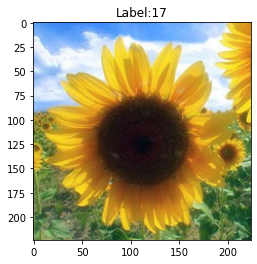

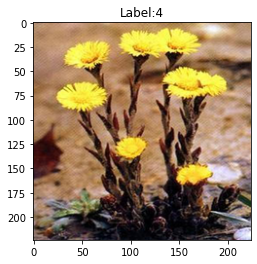

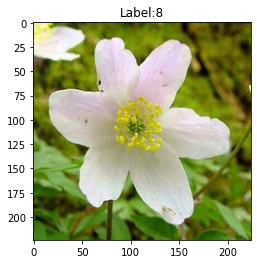

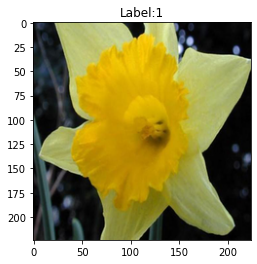

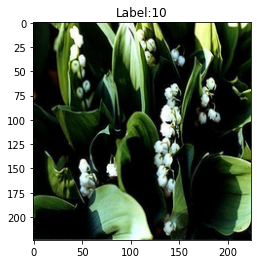

In [28]:
display_images(5)

B. Select any image from the dataset and assign it to a variable

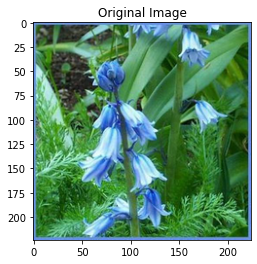

In [29]:
ImageofInterestId=100
ImageOfInterest=X[ImageofInterestId]

plt.title('Original Image')
plt.imshow(ImageOfInterest)
plt.show()

C. Transform the image into grayscale format and display the same

In [30]:
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb

ImageOfInterestgrayscale = rgb2gray(ImageOfInterest)

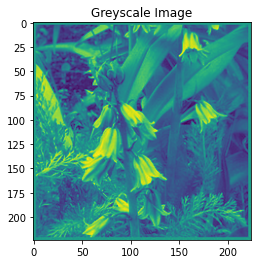

In [31]:
plt.title('Greyscale Image')
plt.imshow(ImageOfInterestgrayscale)
plt.show()

D. Apply a filter to sharpen the image and display the image before and after sharpening

In [32]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

In [33]:
# Source: https://towardsdatascience.com/image-processing-with-python-blurring-and-sharpening-for-beginners-3bcebec0583a
from scipy.signal import convolve2d

def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

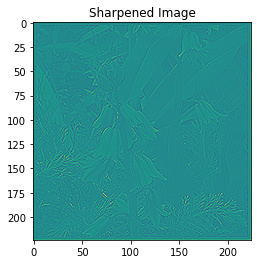

In [34]:
ImageOfInterestgrayscalesharpen = multi_convolver(ImageOfInterestgrayscale, sharpen, 2)

plt.title('Sharpened Image')
plt.imshow(ImageOfInterestgrayscalesharpen)
plt.show()

E. Apply a filter to blur the image and display the image before and after blur 

In [35]:
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])

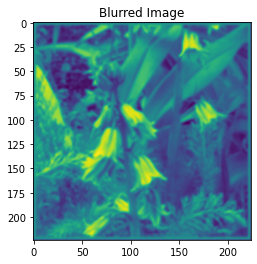

In [36]:
ImageOfInterestgrayscaleblurred = multi_convolver(ImageOfInterestgrayscale, gaussian, 2)

plt.title('Blurred Image')
plt.imshow(ImageOfInterestgrayscaleblurred)
plt.show()

F. Display all the 4 images from above questions besides each other to observe the difference

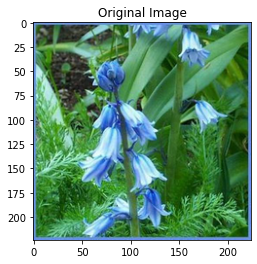

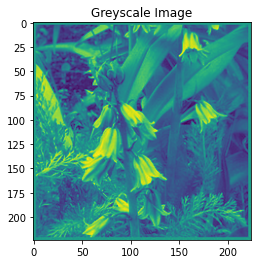

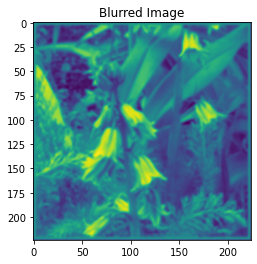

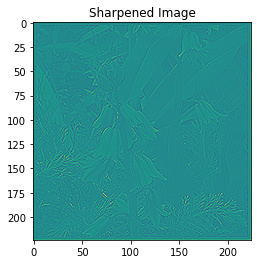

In [37]:
plt.title('Original Image')
plt.imshow(ImageOfInterest)
plt.show()

plt.title('Greyscale Image')
plt.imshow(ImageOfInterestgrayscale)
plt.show()

plt.title('Blurred Image')
plt.imshow(ImageOfInterestgrayscaleblurred)
plt.show()

plt.title('Sharpened Image')
plt.imshow(ImageOfInterestgrayscalesharpen)
plt.show()

3. Model training and Tuning:  

A. Split the data into train and test with 80:20 proportion.  

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("{0:0.2f}% data is in training set".format((len(X_train)/number_of_images) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/number_of_images) * 100))

80.00% data is in training set
20.00% data is in test set


B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. 

In [39]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

#param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
#svc=svm.SVC(probability=True)
svc=svm.SVC

#classifier2=GridSearchCV(svc,param_grid)
classifier2=svc

X_trainForSVM = X_train.reshape(1088,3*224*224)
X_testForSVM = X_test.reshape(272,3*224*224)

print('Shape of X_train for SVM:',X_trainForSVM.shape)
print('Shape of X_test for SVM:',X_testForSVM.shape)

Shape of X_train for SVM: (1088, 150528)
Shape of X_test for SVM: (272, 150528)


In [41]:
y_trainforSVM=[]
for index in range(0,len(y_train)):
    y_trainforSVM.append(flowernumericallabel(y_train[index]))    
    
y_testforSVM=[]
for index in range(0,len(y_test)):
    y_testforSVM.append(flowernumericallabel(y_test[index]))    

In [ ]:
classifier2.fit(X_trainForSVM,y_trainforSVM)

In [ ]:
y_pred=classifier2.predict(X_testForSVM)

print("The predicted Data is :")
print(y_pred)

print("The actual data is:")
print(np.array(y_testforSVM))

print(f"The model is {accuracy_score(y_pred,y_testforSVM)*100}% accurate")

C. Train a model using Neural Network and share performance metrics on test data.  

In [73]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [74]:
print('X_train shape:',X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1088, 224, 224, 3)
X_test shape: (272, 224, 224, 3)
y_train shape: (1088, 17)
y_test shape: (272, 17)


In [75]:
classifier3 = Sequential()

classifier3.add(Dense(32, input_shape = (224, 224, 3),kernel_initializer='he_normal',activation='relu'))
classifier3.add(BatchNormalization())
classifier3.add(Dropout(0.2))
classifier3.add(Dense(32, kernel_initializer='he_normal',activation='relu'))
classifier3.add(BatchNormalization())   
classifier3.add(Dropout(0.2))
classifier3.add(Dense(32, kernel_initializer='he_normal',activation='relu'))
classifier3.add(BatchNormalization())
classifier3.add(Dropout(0.2))
classifier3.add(Flatten())
classifier3.add(Dense(32, kernel_initializer='he_normal',activation='relu'))
classifier3.add(BatchNormalization())
classifier3.add(Dropout(0.2))
classifier3.add(Dense(17, kernel_initializer='he_normal',activation='softmax'))

adam = optimizers.Adam(lr = 0.001)

classifier3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [76]:
classifier3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 224, 224, 32)      128       
_________________________________________________________________
batch_normalization_3 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 224, 224, 32)      0         
_________________________________________________________________
dense_7 (Dense)              (None, 224, 224, 32)      1056      
_________________________________________________________________
batch_normalization_4 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 224, 224, 32)      0         
_________________________________________________________________
dense_8 (Dense)              (None, 224, 224, 32)     

In [49]:
classifier3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=20, verbose = 1)

Train on 1088 samples, validate on 272 samples
Epoch 1/20
1088/1088 [==============================] - ETA: 0s - loss: 2.7202 - acc: 0.2188WARNING:tensorflow:From C:\Users\rgi4\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
1088/1088 [==============================] - 104s 95ms/sample - loss: 2.7202 - acc: 0.2188 - val_loss: 9.4392 - val_acc: 0.1397
Epoch 2/20
1088/1088 [==============================] - 99s 91ms/sample - loss: 2.0879 - acc: 0.3474 - val_loss: 6.1929 - val_acc: 0.1360
Epoch 3/20
1088/1088 [==============================] - 101s 93ms/sample - loss: 1.8937 - acc: 0.3879 - val_loss: 4.6299 - val_acc: 0.1066
Epoch 4/20
1088/1088 [==============================] - 98s 90ms/sample - loss: 1.7725 - acc: 0.432

D. Train a model using a basic CNN and share performance metrics on test data.  

In [77]:
# Initialising the CNN classifier
classifier4 = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier4.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier4.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier4.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier4.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier4.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier4.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier4.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier4.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier4.add(Dropout(0.5))

# Adding a fully connected layer with 128 neurons
classifier4.add(Dense(units = 128, activation = 'relu'))

# The final output layer with 17 neuron to predict the categorical classifcation
classifier4.add(Dense(units = 17, activation = 'softmax'))

In [78]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
classifier4.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [79]:
classifier4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)            

In [80]:
classifier4.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Train on 1088 samples, validate on 272 samples
Epoch 1/20
1088/1088 [==============================] - ETA: 0s - loss: 2.8784 - acc: 0.0919WARNING:tensorflow:From C:\Users\rgi4\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
1088/1088 [==============================] - 19s 17ms/sample - loss: 2.8784 - acc: 0.0919 - val_loss: 2.6760 - val_acc: 0.0772
Epoch 2/20
1088/1088 [==============================] - 19s 18ms/sample - loss: 2.5580 - acc: 0.1498 - val_loss: 2.2857 - val_acc: 0.2757
Epoch 3/20
1088/1088 [==============================] - 19s 17ms/sample - loss: 2.2839 - acc: 0.2491 - val_loss: 2.0172 - val_acc: 0.3199
Epoch 4/20
1088/1088 [==============================] - 19s 17ms/sample - loss: 2.0413 - acc: 0.3217 

E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.  

In [81]:
import random
random_id=random.randint(0,number_of_images)

print('Image ID:',random_id)

Random_image=X[random_id]
Random_image= np.array(Random_image).reshape(-1, 224, 224, 3)

prediction=classifier4.predict(Random_image)

#printing the predicted label
print('Predicted label:', prediction)

#printing actual label
print('Actual label:', y[random_id])

Image ID: 1205
Predicted label: [[6.0321107e-03 5.0609100e-11 7.0717789e-08 1.0490111e-03 9.9011606e-01
  3.3165870e-05 3.6155336e-04 5.5612171e-11 9.4181232e-08 1.1819282e-11
  4.5180217e-11 2.2756717e-08 3.0598138e-04 2.4111523e-05 2.0757818e-03
  9.9491707e-08 1.9922059e-06]]
Actual label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [90]:
import cv2

path = os.getcwd()+'\Prediction.jpg'
Image_to_check = cv2.imread(path,cv2.IMREAD_COLOR)
Image_to_check = cv2.resize(Image_to_check, (224, 224))
Image_to_check = cv2.normalize(Image_to_check, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
Image_to_check= np.array(Image_to_check).reshape(-1, 224, 224, 3)

In [91]:
prediction=classifier4.predict(Image_to_check)

#printing the predicted label
print('Predicted label:', prediction)

Predicted label: [[8.1663664e-08 1.7303333e-04 6.0304719e-06 7.8959971e-11 1.2718572e-10
  3.2906970e-09 7.4320692e-09 9.8757428e-01 3.0281144e-05 1.1154336e-06
  1.1780667e-02 2.2564293e-04 1.5843520e-04 1.7459002e-09 3.8110337e-09
  5.0429142e-05 2.3728118e-15]]
